Background information

Gala Groceries is a technology-led grocery store chain based in the USA. They rely heavily on new technologies, such as IoT to give them a competitive edge over other grocery stores. 

They pride themselves on providing the best quality, fresh produce from locally sourced suppliers. However, this comes with many challenges to consistently deliver on this objective year-round.

Gala Groceries approached Cognizant to help them with a supply chain issue. Groceries are highly perishable items. If you overstock, you are wasting money on excessive storage and waste, but if you understock, then you risk losing customers. They want to know how to better stock the items that they sell.

This is a high-level business problem and will require you to dive into the data in order to formulate some questions and recommendations to the client about what else we need in order to answer that question.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set the display options to show all columns
pd.set_option('display.max_columns', None)

EDA

In [3]:
df = pd.read_csv(r'C:\Users\phili\Dropbox\Documents\2024-data science\sales_comb.csv')
df.head()

,Column1,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,sensor_stock_levels.estimated_stock_pct,sensor_storage_temperature.temperature
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,3/2/2022 9:51,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,-2.24
1,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,3/2/2022 9:51,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,-2.89
2,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,3/2/2022 9:51,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,1.67
3,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,3/2/2022 9:51,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,-2.69
4,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,3/2/2022 9:51,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,0.90


In [4]:
df.shape

(132284, 12)

In [5]:
#let's check for duplicates
df.duplicated().sum()
print(f'There are {df.duplicated().sum()} duplicates in this data that need to be removed')

There are 2594 duplicates in this data that need to be removed


In [6]:
data = df.drop_duplicates()

In [7]:
data.shape

(129690, 12)

In [8]:
data.columns

Index(['Column1', 'transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type',
       'sensor_stock_levels.estimated_stock_pct',
       'sensor_storage_temperature.temperature'],
      dtype='object')

In [9]:
# Set the option to convert inf to NaN
pd.set_option('mode.use_inf_as_na', True)

# Assuming data is your DataFrame
# Convert inf values to NaN in the entire DataFrame
data.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\phili\AppData\Local\Temp\ipykernel_36996\3066762894.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)
C:\Users\phili\AppData\Local\Temp\ipykernel_36996\3066762894.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace([np.inf, -np.inf], np.nan, inplace=True)


In [10]:
data = data.drop(['Column1','transaction_id'], axis = 1 )
data.head(3)

,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,sensor_stock_levels.estimated_stock_pct,sensor_storage_temperature.temperature
0,3/2/2022 9:51,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,-2.24
1,3/2/2022 9:51,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,-2.89
2,3/2/2022 9:51,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,1.67


In [11]:
data = data.rename(columns={'sensor_stock_levels.estimated_stock_pct': 'stock_pct', 'sensor_storage_temperature.temperature': 'temperature'})

data.head(2)

,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,stock_pct,temperature
0,3/2/2022 9:51,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,-2.24
1,3/2/2022 9:51,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,-2.89


In [12]:
data.isna().sum()

timestamp           0
product_id          0
category            0
customer_type       0
unit_price          0
quantity            0
total               0
payment_type        0
stock_pct        1494
temperature        71
dtype: int64

Now that we have the new data all cleaned up, let's proceed to the machine learning

In [13]:
data = data.dropna(axis= 0)

In [14]:
data.isna().sum()

timestamp        0
product_id       0
category         0
customer_type    0
unit_price       0
quantity         0
total            0
payment_type     0
stock_pct        0
temperature      0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128125 entries, 0 to 130784
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   timestamp      128125 non-null  object 
 1   product_id     128125 non-null  object 
 2   category       128125 non-null  object 
 3   customer_type  128125 non-null  object 
 4   unit_price     128125 non-null  float64
 5   quantity       128125 non-null  int64  
 6   total          128125 non-null  float64
 7   payment_type   128125 non-null  object 
 8   stock_pct      128125 non-null  float64
 9   temperature    128125 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 10.8+ MB


In [16]:
data.nunique()

timestamp        3609
product_id        300
category           22
customer_type       5
unit_price         64
quantity            4
total             255
payment_type        4
stock_pct         100
temperature      2851
dtype: int64

let's visualize the data now 

In [17]:
import datetime as dt
# Assuming data is your DataFrame
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract day, year, week, and hour
data['day'] = data['timestamp'].dt.day
data['year'] = data['timestamp'].dt.year
data['week'] = data['timestamp'].dt.isocalendar().week
data['hour'] = data['timestamp'].dt.hour


In [18]:
data.head(3)

,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,stock_pct,temperature,day,year,week,hour
0,2022-03-02 09:51:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,-2.24,2,2022,9,9
1,2022-03-02 09:51:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,-2.89,2,2022,9,9
2,2022-03-02 09:51:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,1.67,2,2022,9,9


In [19]:
data.columns

Index(['timestamp', 'product_id', 'category', 'customer_type', 'unit_price',
       'quantity', 'total', 'payment_type', 'stock_pct', 'temperature', 'day',
       'year', 'week', 'hour'],
      dtype='object')

In [20]:
columns = ['timestamp', 'product_id', 'category', 'customer_type', 'unit_price',
       'quantity', 'total', 'payment_type', 'stock_pct', 'temperature']

Top 10 categories by counts

In [21]:
data['category'].value_counts()

category
fruit                    16498
vegetables               13905
packaged foods            8728
refrigerated items        6993
baked goods               6967
canned foods              6865
dairy                     6086
kitchen                   6018
meat                      5938
cleaning products         4927
beverages                 4891
cheese                    4873
snacks                    4541
baking                    4351
seafood                   4310
frozen                    4005
baby products             3866
medicine                  3757
condiments and sauces     3098
personal care             3038
pets                      2491
spices and herbs          1979
Name: count, dtype: int64

<Axes: ylabel='category'>

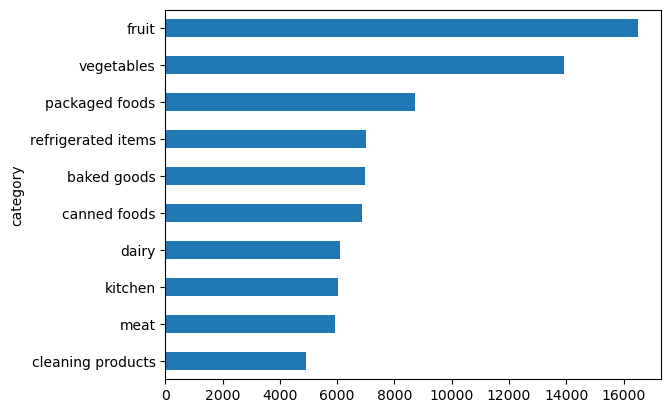

In [22]:
data['category'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind ='barh')

The most prevalent category in the dataset is "fruit," with 16,498 occurrences. Following fruit, "vegetables" rank second with 13,905 instances. "Packaged foods" come in third with 8,728 occurrences, while "refrigerated items" rank fourth with 6,993 instances. "Baked goods" and "canned foods" closely follow with 6,967 and 6,865 occurrences, respectively. Other categories such as "dairy," "kitchen," "meat," and "cleaning products" also appear in the dataset, with counts ranging from 4,927 to 6,086.

top customers

<Axes: ylabel='customer_type'>

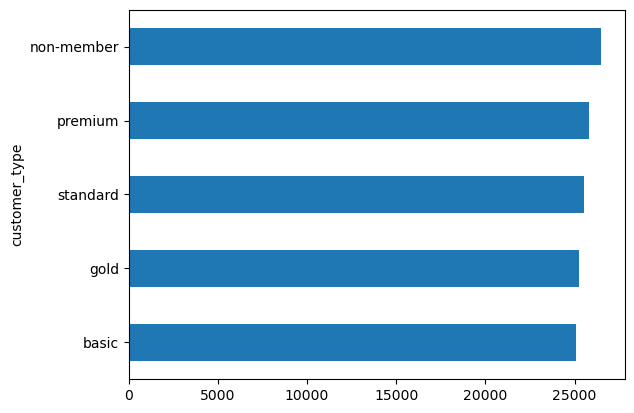

In [23]:
data['customer_type'].value_counts().sort_values(ascending=True).plot(kind ='barh')


The top customer category, based on the count in the customer_type column, is non-member, with 26,495 occurrences. Following closely behind are premium customers, with a count of 25,796. Standard customers rank third in frequency, totaling 25,515. Gold customers trail slightly with 25,254 instances, and basic customers complete the list with 25,065 occurrences.

The dataset reveals the presence of five distinct customer types: non-members, premium, standard, gold, and basic. Notably, non-members emerge as the customer segment with the highest frequency of purchases."

<Axes: ylabel='payment_type'>

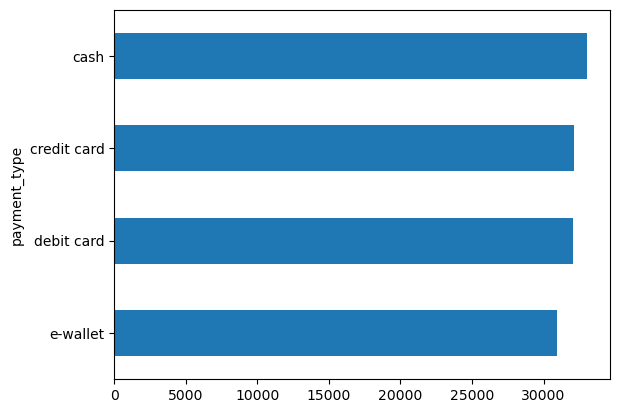

In [24]:
data['payment_type'].value_counts().nlargest(10).sort_values(ascending=True).plot(kind ='barh')


The payment_type column indicates that there are four primary payment methods: cash, credit card, debit card, and e-wallet. Among these, cash transactions have the highest count at 33,006, followed closely by credit card transactions at 32,163, then debit card transactions at 32,028, and finally, e-wallet transactions at 30,928.

In [25]:
data.groupby('category')['quantity'].sum().sort_values(ascending= False)

category
fruit                    40450
vegetables               34864
packaged foods           22225
refrigerated items       17739
canned foods             17422
baked goods              17142
kitchen                  15365
dairy                    15158
meat                     14617
cheese                   12860
cleaning products        12488
beverages                12447
snacks                   11218
seafood                  11210
baking                   10841
frozen                   10165
baby products             9157
medicine                  8894
personal care             7751
condiments and sauces     7497
pets                      6247
spices and herbs          4875
Name: quantity, dtype: int64

In [26]:
data.groupby('category')['total'].sum().sort_values(ascending= False)

category
kitchen                  231654.65
meat                     220100.73
seafood                  177627.60
cleaning products        168033.82
beverages                158579.23
medicine                 154879.96
baked goods              129576.18
refrigerated items       124944.11
dairy                    119682.62
baby products            113134.03
cheese                   110375.40
packaged foods           109084.85
canned foods             106376.68
fruit                    101498.60
frozen                   100607.75
vegetables                86286.86
personal care             70076.49
pets                      64777.63
baking                    57828.09
condiments and sauces     49966.03
snacks                    25340.42
spices and herbs          14934.65
Name: total, dtype: float64

In [27]:
data['hour'].value_counts()

hour
12    12946
18    12486
16    12083
11    11917
14    11606
9     11586
19    11569
10    11378
13    10933
15    10873
17    10748
Name: count, dtype: int64

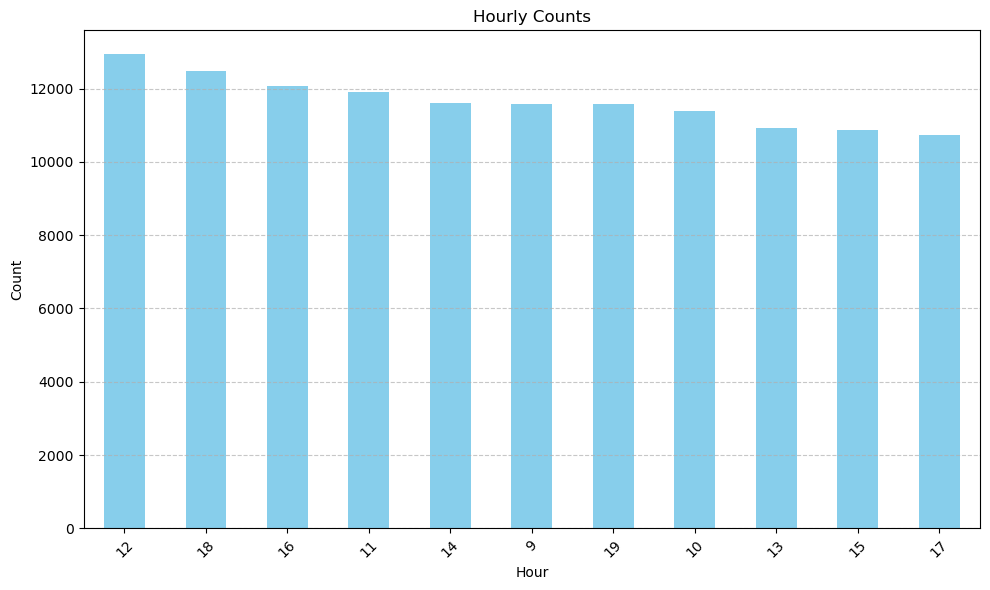

Statistical Summary:
                           timestamp     unit_price       quantity  \
count                         128125  128125.000000  128125.000000   
mean   2022-03-04 13:10:05.705678336       7.747914       2.502494   
min              2022-03-01 09:00:00       0.190000       1.000000   
25%              2022-03-02 16:45:00       3.990000       1.000000   
50%              2022-03-04 13:36:00       6.990000       3.000000   
75%              2022-03-06 11:08:00      10.990000       4.000000   
max              2022-03-07 19:59:00      23.990000       4.000000   
std                              NaN       5.380611       1.127050   

               total      stock_pct    temperature            day      year  \
count  128125.000000  128125.000000  128125.000000  128125.000000  128125.0   
mean       19.476030       0.504234      -0.182767       3.945007    2022.0   
min         0.190000       0.010000     -30.990000       1.000000    2022.0   
25%         6.490000       0.260

In [28]:

# Create a DataFrame from the given Series
data1 = pd.Series([12946, 12486, 12083, 11917, 11606, 11586, 11569, 11378, 10933, 10873, 10748],
                 index=[12, 18, 16, 11, 14, 9, 19, 10, 13, 15, 17],
                 name='count')

# Statistical summary
summary = data.describe()

# Visualization
plt.figure(figsize=(10, 6))
data1.plot(kind='bar', color='skyblue')
plt.title('Hourly Counts')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print the statistical summary
print("Statistical Summary:")
print(summary)


In [29]:
# Find the hour with the highest count
busiest_hour = data1.idxmax()

# Get the count for the busiest hour
busiest_hour_count = data1.max()

print(f"The busiest hour of the day is {busiest_hour} with a count of {busiest_hour_count}.")


The busiest hour of the day is 12 with a count of 12946.


Quick summary

I found the following insights as part of the analysis: 

Fruit & vegetables are the 2 most frequently bought product categories 
Non-members are the most frequent buyers within the store 
Cash is the most frequently used payment method 
11am is the busiest hour with regards to number of transactions 
As a reminder, the client indicated that they wanted to know the following: “How to better stock the items that they sell.” 

Machine learning

“Can we accurately predict the stock levels of products based on sales data and sensor data on an hourly basis in order to more intelligently procure products from our suppliers?” 

In [30]:
data.head(3)

,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,stock_pct,temperature,day,year,week,hour
0,2022-03-02 09:51:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,-2.24,2,2022,9,9
1,2022-03-02 09:51:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,-2.89,2,2022,9,9
2,2022-03-02 09:51:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,1.67,2,2022,9,9


In [31]:
combined_data = data.copy()

Feature Engineering

In [32]:
import pandas as pd

# Assuming your DataFrame is named 'data'

# Convert 'timestamp' column to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Hourly Aggregations
data['hourly_sales_volume'] = data.groupby(data['timestamp'].dt.hour)['product_id'].transform('count')
data['hourly_revenue'] = data.groupby(data['timestamp'].dt.hour)['total'].transform('sum')
data['hourly_avg_unit_price'] = data.groupby(data['timestamp'].dt.hour)['unit_price'].transform('mean')
data['hourly_total_quantity'] = data.groupby(data['timestamp'].dt.hour)['quantity'].transform('sum')

# Temporal Features
data['day_of_week'] = data['timestamp'].dt.dayofweek
data['month'] = data['timestamp'].dt.month
data['hour_of_day'] = data['timestamp'].dt.hour

# Historical Features
data['lagged_sales_volume'] = data['hourly_sales_volume'].shift(1)
data['rolling_avg_sales_volume'] = data['hourly_sales_volume'].rolling(window=24).mean()

# Sensor Data Features
# Assuming 'temperature' is a sensor data column
data['temperature'] = data['temperature']

# Stock Level Features
data['lagged_stock_percentage'] = data['stock_pct'].shift(1)

# Categorical Features
# Assuming 'category' and 'customer_type' are categorical columns
#data = pd.get_dummies(data, columns=['category', 'customer_type'])





In [33]:
data.columns

Index(['timestamp', 'product_id', 'category', 'customer_type', 'unit_price',
       'quantity', 'total', 'payment_type', 'stock_pct', 'temperature', 'day',
       'year', 'week', 'hour', 'hourly_sales_volume', 'hourly_revenue',
       'hourly_avg_unit_price', 'hourly_total_quantity', 'day_of_week',
       'month', 'hour_of_day', 'lagged_sales_volume',
       'rolling_avg_sales_volume', 'lagged_stock_percentage'],
      dtype='object')

In [34]:
data.head()

,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,stock_pct,temperature,day,year,week,hour,hourly_sales_volume,hourly_revenue,hourly_avg_unit_price,hourly_total_quantity,day_of_week,month,hour_of_day,lagged_sales_volume,rolling_avg_sales_volume,lagged_stock_percentage
0,2022-03-02 09:51:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,-2.24,2,2022,9,9,11586,222471.34,7.644877,30076,2,3,9,NaN,NaN,NaN
1,2022-03-02 09:51:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,-2.89,2,2022,9,9,11586,222471.34,7.644877,30076,2,3,9,11586.0,NaN,0.38
2,2022-03-02 09:51:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,1.67,2,2022,9,9,11586,222471.34,7.644877,30076,2,3,9,11586.0,NaN,0.38
3,2022-03-02 09:51:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,-2.69,2,2022,9,9,11586,222471.34,7.644877,30076,2,3,9,11586.0,NaN,0.38
4,2022-03-02 09:51:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,0.38,0.90,2,2022,9,9,11586,222471.34,7.644877,30076,2,3,9,11586.0,NaN,0.38


In [35]:
data.isna().sum()

timestamp                    0
product_id                   0
category                     0
customer_type                0
unit_price                   0
quantity                     0
total                        0
payment_type                 0
stock_pct                    0
temperature                  0
day                          0
year                         0
week                         0
hour                         0
hourly_sales_volume          0
hourly_revenue               0
hourly_avg_unit_price        0
hourly_total_quantity        0
day_of_week                  0
month                        0
hour_of_day                  0
lagged_sales_volume          1
rolling_avg_sales_volume    23
lagged_stock_percentage      1
dtype: int64

In [36]:
data = data.dropna(axis = 0)


In [37]:
dff = data.drop(['timestamp', 'product_id', 'payment_type', 'day',
       'year', 'week', 'hour'], axis = 1)

In [38]:
dff.head()

,category,customer_type,unit_price,quantity,total,stock_pct,temperature,hourly_sales_volume,hourly_revenue,hourly_avg_unit_price,hourly_total_quantity,day_of_week,month,hour_of_day,lagged_sales_volume,rolling_avg_sales_volume,lagged_stock_percentage
23,canned foods,gold,2.49,1,2.49,0.38,-2.69,11586,222471.34,7.644877,30076,2,3,9,11586.0,11586.0,0.38
24,canned foods,gold,2.49,1,2.49,0.38,0.90,11586,222471.34,7.644877,30076,2,3,9,11586.0,11586.0,0.38
25,meat,gold,20.49,4,81.96,0.38,-2.24,11586,222471.34,7.644877,30076,2,3,9,11586.0,11586.0,0.38
26,meat,gold,20.49,4,81.96,0.38,-2.89,11586,222471.34,7.644877,30076,2,3,9,11586.0,11586.0,0.38
27,meat,gold,20.49,4,81.96,0.38,1.67,11586,222471.34,7.644877,30076,2,3,9,11586.0,11586.0,0.38


label encoding

In [39]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [40]:
 #Categorical Features
# Assuming 'category' and 'customer_type' are categorical columns

cols = ['customer_type', 'category']


In [41]:
# Trasform other categories 
for i in cols:
    dff[i]=le.fit_transform(data[i])

In [42]:
dff.head()

,category,customer_type,unit_price,quantity,total,stock_pct,temperature,hourly_sales_volume,hourly_revenue,hourly_avg_unit_price,hourly_total_quantity,day_of_week,month,hour_of_day,lagged_sales_volume,rolling_avg_sales_volume,lagged_stock_percentage
23,4,1,2.49,1,2.49,0.38,-2.69,11586,222471.34,7.644877,30076,2,3,9,11586.0,11586.0,0.38
24,4,1,2.49,1,2.49,0.38,0.90,11586,222471.34,7.644877,30076,2,3,9,11586.0,11586.0,0.38
25,12,1,20.49,4,81.96,0.38,-2.24,11586,222471.34,7.644877,30076,2,3,9,11586.0,11586.0,0.38
26,12,1,20.49,4,81.96,0.38,-2.89,11586,222471.34,7.644877,30076,2,3,9,11586.0,11586.0,0.38
27,12,1,20.49,4,81.96,0.38,1.67,11586,222471.34,7.644877,30076,2,3,9,11586.0,11586.0,0.38


data processing

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [44]:
X = dff.drop('stock_pct', axis = 1).values
y = dff['stock_pct'].values.ravel()

In [45]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,test_size = 0.2, random_state = 0)

scaling data

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [47]:
ncol = ['category', 'customer_type', 'unit_price', 'quantity', 'total',
       'stock_pct', 'temperature', 'hourly_sales_volume', 'hourly_revenue',
       'hourly_avg_unit_price', 'hourly_total_quantity', 'day_of_week',
       'month', 'hour_of_day', 'lagged_sales_volume',
       'rolling_avg_sales_volume', 'lagged_stock_percentage']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numerical columns
dff[ncol] = scaler.fit_transform(dff[ncol])

In [48]:
dff.head()

,category,customer_type,unit_price,quantity,total,stock_pct,temperature,hourly_sales_volume,hourly_revenue,hourly_avg_unit_price,hourly_total_quantity,day_of_week,month,hour_of_day,lagged_sales_volume,rolling_avg_sales_volume,lagged_stock_percentage
23,-1.085679,-0.719148,-0.977299,-1.333278,-0.984800,-0.434289,-0.221178,-0.149203,-0.462179,-0.537764,0.540853,-0.482691,0.0,-1.576011,-0.149214,-0.169647,-0.434279
24,-1.085679,-0.719148,-0.977299,-1.333278,-0.984800,-0.434289,0.095497,-0.149203,-0.462179,-0.537764,0.540853,-0.482691,0.0,-1.576011,-0.149214,-0.169647,-0.434279
25,0.180518,-0.719148,2.367947,1.328651,3.622058,-0.434289,-0.181483,-0.149203,-0.462179,-0.537764,0.540853,-0.482691,0.0,-1.576011,-0.149214,-0.169647,-0.434279
26,0.180518,-0.719148,2.367947,1.328651,3.622058,-0.434289,-0.238820,-0.149203,-0.462179,-0.537764,0.540853,-0.482691,0.0,-1.576011,-0.149214,-0.169647,-0.434279
27,0.180518,-0.719148,2.367947,1.328651,3.622058,-0.434289,0.163419,-0.149203,-0.462179,-0.537764,0.540853,-0.482691,0.0,-1.576011,-0.149214,-0.169647,-0.434279


In [49]:
# Model training (example using Random Forest Regressor)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.020642733589856084


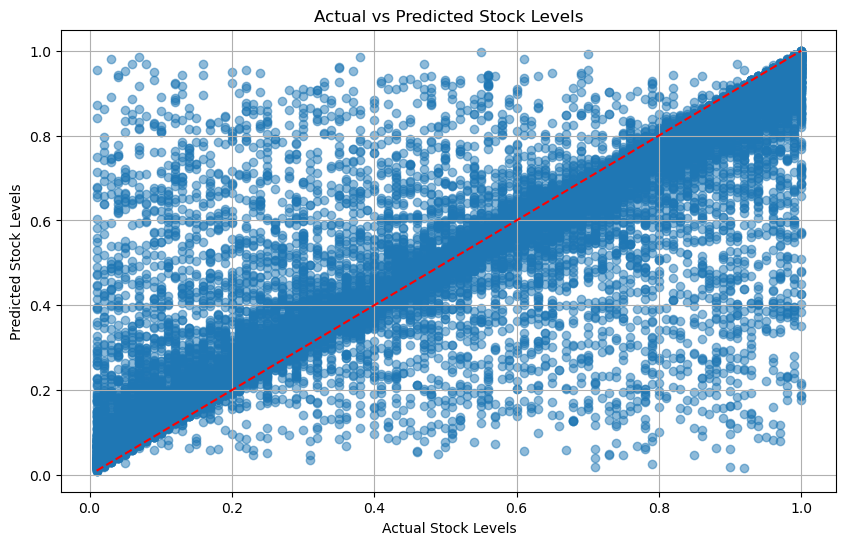

In [53]:


# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # diagonal line
plt.title('Actual vs Predicted Stock Levels')
plt.xlabel('Actual Stock Levels')
plt.ylabel('Predicted Stock Levels')
plt.grid(True)
plt.show()


Feature performance

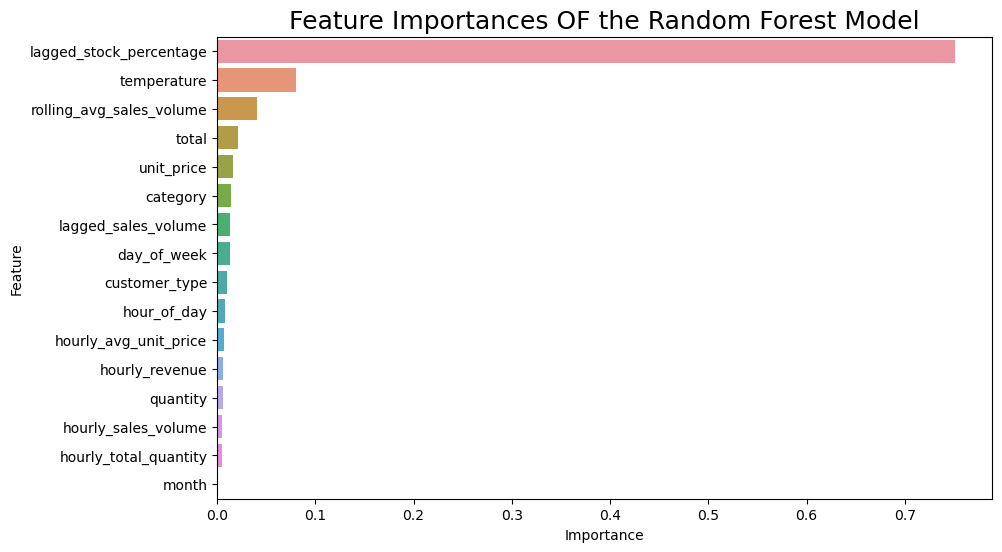

                     Feature  Importance
15   lagged_stock_percentage    0.751249
5                temperature    0.080276
14  rolling_avg_sales_volume    0.040823
4                      total    0.021636
2                 unit_price    0.016189
0                   category    0.014382
13       lagged_sales_volume    0.013582
10               day_of_week    0.013359
1              customer_type    0.009846
12               hour_of_day    0.008520
8      hourly_avg_unit_price    0.007493
7             hourly_revenue    0.006137
3                   quantity    0.005920
6        hourly_sales_volume    0.005455
9      hourly_total_quantity    0.005133
11                     month    0.000000


In [64]:
# Get feature importances
feature_importances = model.feature_importances_

columns = ['category', 'customer_type', 'unit_price', 'quantity', 'total',
       'temperature', 'hourly_sales_volume', 'hourly_revenue',
       'hourly_avg_unit_price', 'hourly_total_quantity', 'day_of_week',
       'month', 'hour_of_day', 'lagged_sales_volume',
       'rolling_avg_sales_volume', 'lagged_stock_percentage']

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x = feature_importance_df['Importance'], y = feature_importance_df['Feature'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances OF the Random Forest Model', size = 18)
plt.show()
 
# Display feature importance summary
print(feature_importance_df)


Summary 

The model, based on the Mean Squared Error (MSE) of 0.0206, performs reasonably well in predicting stock levels. However, without understanding the context of the stock levels' range, it's challenging to gauge the model's absolute effectiveness. The dataset includes various features such as category, customer type, unit price, quantity, temperature, and hourly sales volume, which offer valuable insights for prediction.

To enhance the model, further feature engineering is recommended, potentially incorporating external data sources or creating additional features based on domain knowledge. Experimentation with alternative regression algorithms like Gradient Boosting or Support Vector Machines may improve performance. Additionally, fine-tuning the model's hyperparameters and ensuring robustness through techniques like cross-validation are crucial steps. Maintaining data quality, exploring real-time integration into procurement processes, and continuous monitoring for model refinement are key for sustained effectiveness.

Conclusion

Based on the results obtained from the Random Forest model and the feature importances, it appears that the sensor data, particularly the "lagged_stock_percentage" feature, plays a crucial role in predicting the stock levels of products. This suggests that historical stock percentage data, possibly indicating inventory trends, is highly predictive.

However, it's important to note that while sensor data contributes significantly, other features such as temperature and rolling average sales volume also have notable importance in the prediction. Therefore, a combination of sales data and sensor data could indeed provide valuable insights for intelligent procurement decisions.

In conclusion, based on the model's performance and the feature importances, it is plausible to expect that leveraging both sales data and sensor data on an hourly basis can help in accurately predicting stock levels. This predictive capability can enable businesses to make more informed procurement decisions, optimizing inventory management processes and potentially reducing costs associated with overstocking or stockouts.